# 0. Instalacion de utilitarios Pyspark

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.3.4/spark-2.3.4-bin-hadoop2.7.tgz
!tar xf spark-2.3.4-bin-hadoop2.7.tgz

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz


In [0]:
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"


In [5]:
!pip install pyspark

     |████████████████████████████████| 215.7MB 56kB/s 
     |████████████████████████████████| 204kB 50.9MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.4-py2.py3-none-any.whl size=216130387 sha256=df699865c264db9422a146a0cbeeb6f0d24edc5f6f1b57d284f61146924c7b5f
  Stored in directory: /root/.cache/pip/wheels/ab/09/4d/0d184230058e654eb1b04467dbc1292f00eaa186544604b471
Successfully built pyspark


In [0]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
spark = SparkSession.builder.master("local").getOrCreate()
sc = SparkContext.getOrCreate()

# 1. Lectura del origen datos

In [0]:
# Lectura desde un archivo fisico
from google.colab import files
uploaded = files.upload()

In [7]:

# Conexion al drive
#---------------------------
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
ls

#2.  Cargando los datos en formato Spark

In [8]:
DS_peliculas_rating = spark.read.csv('/content/drive/My Drive/PySpark Machine Learning en plataforma Big Data/Training R ML en Casos de Negocios/8_Recomendacion_comercio/Comercio_tipo_rappi.csv', sep=';', header=True, inferSchema=True)

# 2.1 Revision de formatos 
DS_peliculas_rating.printSchema()

root
 |-- userID: string (nullable = true)
 |-- userID_cod: integer (nullable = true)
 |-- placeID: integer (nullable = true)
 |-- Nombre_comerce: string (nullable = true)
 |-- Distrito: string (nullable = true)
 |-- rating: integer (nullable = true)
 |-- food_rating: integer (nullable = true)
 |-- service_rating: integer (nullable = true)
 |-- rating_total: integer (nullable = true)



In [9]:
# Dimensiona de base
print((DS_peliculas_rating.count(),len(DS_peliculas_rating.columns)))

(50766, 9)


In [10]:
# 2.2 Revisiones  
DS_peliculas_rating.show(5)

+------+----------+-------+--------------------+---------------+------+-----------+--------------+------------+
|userID|userID_cod|placeID|      Nombre_comerce|       Distrito|rating|food_rating|service_rating|rating_total|
+------+----------+-------+--------------------+---------------+------+-----------+--------------+------------+
| U1077|         1| 135085|Tortas Locas Hipo...|San Luis Potosi|     2|          2|             2|           6|
| U1077|         1| 135038|Restaurant la Cha...|San Luis Potosi|     2|          2|             1|           5|
| U1077|         1| 132825|     puesto de tacos|         s.l.p.|     2|          2|             2|           6|
| U1077|         1| 135060|Restaurante Maris...|San Luis Potosi|     1|          2|             2|           5|
| U1068|         2| 135104|                vips|              0|     1|          1|             2|           4|
+------+----------+-------+--------------------+---------------+------+-----------+--------------+------

In [11]:
# 2.3 Validacion de carga del total de registros
print(DS_peliculas_rating.count())

50766


In [12]:
# 2.4 Exploracion inicial
DS_peliculas_rating.describe().show()

+-------+------+------------------+------------------+--------------------+---------+------------------+------------------+------------------+-----------------+
|summary|userID|        userID_cod|           placeID|      Nombre_comerce| Distrito|            rating|       food_rating|    service_rating|     rating_total|
+-------+------+------------------+------------------+--------------------+---------+------------------+------------------+------------------+-----------------+
|  count| 50766|             50766|             50766|               50766|    50766|             50766|             50766|             50766|            50766|
|   mean|  null| 67.34026710790687|  134254.559390143|                null|      0.0|1.2218216916834101| 1.244277666154513| 1.109856990899421|3.575956348737344|
| stddev|  null|32.640689951647815|1079.9216692471784|                null|      0.0|0.7706200957794772|0.7863420037824467|0.7915679876580894|2.083855254035862|
|    min| U1001|                 1

In [16]:
# Filtrando aquellos comercios que no se encuentren en el distrito de San Luis de Potosi
DS_peliculas_rating.groupBy('Distrito').count().orderBy('count',ascending=False).show()

+----------------+-----+
|        Distrito|count|
+----------------+-----+
| San Luis Potosi|33108|
|               0| 4283|
|      Cuernavaca| 3824|
| san luis potosi| 1969|
|        victoria| 1642|
|          s.l.p.| 1387|
|        Jiutepec| 1001|
|         Soledad|  705|
| Ciudad Victoria|  629|
|           s.l.p|  497|
|      cuernavaca|  467|
|             slp|  319|
|san luis potosi |  268|
|       victoria |  252|
|     Cd Victoria|  216|
|    Cd. Victoria|  100|
|  san luis potos|   99|
+----------------+-----+



In [0]:
# Considerando los siguientes distritos a filtrar: San Luis Potosi, san luis potosi, s.l.p., s.l.p, slp, san luis potosi, san luis potos
DS_peliculas_rating = DS_peliculas_rating[DS_peliculas_rating["Distrito"] != 'San Luis Potosi']
DS_peliculas_rating = DS_peliculas_rating[DS_peliculas_rating["Distrito"] != 'san luis potosi']
DS_peliculas_rating = DS_peliculas_rating[DS_peliculas_rating["Distrito"] != 's.l.p.']
DS_peliculas_rating = DS_peliculas_rating[DS_peliculas_rating["Distrito"] != 's.l.p']
DS_peliculas_rating = DS_peliculas_rating[DS_peliculas_rating["Distrito"] != 'slp']
DS_peliculas_rating = DS_peliculas_rating[DS_peliculas_rating["Distrito"] != 'san luis potosi ']
DS_peliculas_rating = DS_peliculas_rating[DS_peliculas_rating["Distrito"] != 'san luis potos']


In [19]:
DS_peliculas_rating.groupBy('Distrito').count().orderBy('count',ascending=False).show()

+---------------+-----+
|       Distrito|count|
+---------------+-----+
|              0| 4283|
|     Cuernavaca| 3824|
|       victoria| 1642|
|       Jiutepec| 1001|
|        Soledad|  705|
|Ciudad Victoria|  629|
|     cuernavaca|  467|
|      victoria |  252|
|    Cd Victoria|  216|
|   Cd. Victoria|  100|
+---------------+-----+



In [20]:
# 2.5 Los clientes que más vistaron la plataforma de videos
DS_peliculas_rating.groupBy('userId').count().orderBy('count',ascending=False).show(10,False)

+------+-----+
|userId|count|
+------+-----+
|U1133 |423  |
|U1082 |401  |
|U1093 |392  |
|U1030 |392  |
|U1123 |360  |
|U1103 |360  |
|U1035 |348  |
|U1042 |305  |
|U1118 |301  |
|U1100 |294  |
+------+-----+
only showing top 10 rows



In [21]:
# 2.6  Las clientes que menos vieron las peliculas
DS_peliculas_rating.groupBy('userId').count().orderBy('count',ascending=True).show(10,False)

+------+-----+
|userId|count|
+------+-----+
|U1136 |19   |
|U1049 |20   |
|U1057 |20   |
|U1112 |20   |
|U1088 |35   |
|U1001 |35   |
|U1081 |35   |
|U1092 |38   |
|U1098 |38   |
|U1048 |38   |
+------+-----+
only showing top 10 rows



In [22]:
# 2.7  Las peliculas con mayor numero de visualizaciones
DS_peliculas_rating.groupBy('Nombre_comerce').count().orderBy('count',ascending=False).show(10,False)

+-------------------------------+-----+
|Nombre_comerce                 |count|
+-------------------------------+-----+
|Rincon Huasteco                |581  |
|Gordas de morales              |548  |
|crudalia                       |547  |
|Mariscos Tia Licha             |467  |
|Sanborns Casa Piedra           |460  |
|Subway                         |438  |
|Restaurant Las Mananitas       |432  |
|Little Cesarz                  |373  |
|pizza clasica                  |367  |
|Restaurante la Estrella de Dima|338  |
+-------------------------------+-----+
only showing top 10 rows



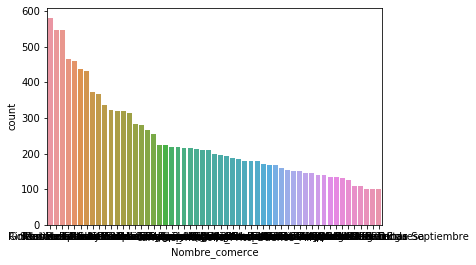

In [23]:
#Graficas
res= DS_peliculas_rating.groupBy('Nombre_comerce').count().orderBy('count',ascending=False)
red=res.toPandas()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ax=sns.barplot(x="Nombre_comerce", y="count", data=red)



In [24]:
# Peliculas con menos numero de visualizaciones 
DS_peliculas_rating.groupBy('Nombre_comerce').count().orderBy('count',ascending=True).show(10,False)

+-------------------------------------+-----+
|Nombre_comerce                       |count|
+-------------------------------------+-----+
|Carnitas Mata  Calle 16 de Septiembre|100  |
|cafe ambar                           |100  |
|la perica hamburguesa                |102  |
|tortas hawai                         |109  |
|puesto de gorditas                   |109  |
|churchs                              |126  |
|TACOS EL GUERO                       |133  |
|Arrachela Grill                      |135  |
|el pueblito                          |136  |
|Los Vikingos                         |141  |
+-------------------------------------+-----+
only showing top 10 rows



In [25]:
# Peliculas con menos numero de visualizaciones 
DS_peliculas_rating.groupBy('Nombre_comerce','Distrito').count().orderBy('count',ascending=False).show(10,False)

+-------------------------------+---------------+-----+
|Nombre_comerce                 |Distrito       |count|
+-------------------------------+---------------+-----+
|Rincon Huasteco                |0              |581  |
|Gordas de morales              |0              |548  |
|crudalia                       |0              |547  |
|Mariscos Tia Licha             |cuernavaca     |467  |
|Sanborns Casa Piedra           |Cuernavaca     |460  |
|Subway                         |Cuernavaca     |438  |
|Restaurant Las Mananitas       |Cuernavaca     |432  |
|Little Cesarz                  |Ciudad Victoria|373  |
|pizza clasica                  |Soledad        |367  |
|Restaurante la Estrella de Dima|Soledad        |338  |
+-------------------------------+---------------+-----+
only showing top 10 rows



In [28]:
# Que clientes consumen mas en cierto establecimiento
DS_peliculas_rating.filter(DS_peliculas_rating['Nombre_comerce']=='Rincon Huasteco').groupby('userID').count().orderBy('count',ascending=False).show(10,False)

+------+-----+
|userID|count|
+------+-----+
|U1019 |73   |
|U1005 |73   |
|U1037 |73   |
|U1115 |49   |
|U1105 |49   |
|U1094 |49   |
|U1075 |49   |
|U1126 |41   |
|U1014 |35   |
|U1088 |35   |
+------+-----+
only showing top 10 rows



# 3. Feature Engineering: Tansforma pelicula a numero



In [0]:
# Importando el codifocador
from pyspark.ml.feature import StringIndexer,IndexToString

In [0]:
# Configurando la Numerzación los titulos de las peliculas
# title_new = La codificación de las peliculas
stringIndexer = StringIndexer(inputCol="Nombre_comerce", outputCol="Nombre_comerce_new")

In [0]:
#Aplicando la numerización de peliculas
model = stringIndexer.fit(DS_peliculas_rating)

In [0]:
#Creando un nuevo Dataframe con el indexado creado
indexed = model.transform(DS_peliculas_rating)

In [33]:
#Revision de los indices
#Ya tenemos las 3 cosas que necesitamos... codigo de cliente... codigo de producto y valoracion
indexed.show(10)

+------+----------+-------+--------------------+---------------+------+-----------+--------------+------------+------------------+
|userID|userID_cod|placeID|      Nombre_comerce|       Distrito|rating|food_rating|service_rating|rating_total|Nombre_comerce_new|
+------+----------+-------+--------------------+---------------+------+-----------+--------------+------------+------------------+
| U1068|         2| 135104|                vips|              0|     1|          1|             2|           4|              21.0|
| U1068|         2| 132740|Carreton de Flaut...|Ciudad Victoria|     0|          0|             0|           0|              17.0|
| U1068|         2| 132663|           tacos abi|       victoria|     1|          1|             1|           3|              27.0|
| U1068|         2| 132732|  Taqueria EL amigo |    Cd Victoria|     0|          0|             0|           0|              22.0|
| U1068|         2| 132630|          palomo tec|       victoria|     1|          1|

In [34]:
#Numero de veces que cada titulo ha aparecido
indexed.groupBy('Nombre_comerce_new').count().orderBy('count',ascending=False).show(10,False)

+------------------+-----+
|Nombre_comerce_new|count|
+------------------+-----+
|0.0               |581  |
|1.0               |548  |
|2.0               |547  |
|3.0               |467  |
|4.0               |460  |
|5.0               |438  |
|6.0               |432  |
|7.0               |373  |
|8.0               |367  |
|9.0               |338  |
+------------------+-----+
only showing top 10 rows



# 4. Dividiendo la data en muestra de entrenamiento y validacion


In [0]:
#4.1  Data de entrenamiento y validacion
train,test=indexed.randomSplit([0.80,0.20], seed = 1234)

In [36]:
# Nro de entrenamiento
train.count()

10506

In [37]:
# Nro de Validacion
test.count()

2613

# 5. Entrenando el Modelo


In [0]:
#Importando el modelo Recomendador ALS
from pyspark.sql.functions import *
from pyspark.ml.recommendation import ALS


In [0]:
#Configuracion del Entrenamiento del modelo Recomendador usando la muetsra de entrenamiento
rec=ALS(maxIter=20,regParam=0.0001,userCol='userID_cod',itemCol='Nombre_comerce_new',ratingCol='rating_total',nonnegative=True,coldStartStrategy="drop",implicitPrefs=False, seed=1234)

# maxIter: El maximo de iteraciones
# regParam: Parametro de Regularización
# nonnegative: Especificar si se utiliza una restriccion negativa en los Minimos cuadrados
# coldStartStrategy: Parametro que elimina cualquier cliente que no tenga informacion
# implicitPrefs: Si es implicito hace referencia a feedback no registrado voluntariamente por el cliente

In [0]:
#Entrenando el modelo
rec_model=rec.fit(train)

In [0]:
#Haciendo las predicciones en la data de test 
predicted_ratings=rec_model.transform(test)

In [42]:
#Revisando los pronostico
predicted_ratings.printSchema()

root
 |-- userID: string (nullable = true)
 |-- userID_cod: integer (nullable = true)
 |-- placeID: integer (nullable = true)
 |-- Nombre_comerce: string (nullable = true)
 |-- Distrito: string (nullable = true)
 |-- rating: integer (nullable = true)
 |-- food_rating: integer (nullable = true)
 |-- service_rating: integer (nullable = true)
 |-- rating_total: integer (nullable = true)
 |-- Nombre_comerce_new: double (nullable = false)
 |-- prediction: float (nullable = false)



In [43]:
# Revision rapida de los pronosticos
predicted_ratings.orderBy(rand()).show(10)

+------+----------+-------+--------------------+----------+------+-----------+--------------+------------+------------------+------------+
|userID|userID_cod|placeID|      Nombre_comerce|  Distrito|rating|food_rating|service_rating|rating_total|Nombre_comerce_new|  prediction|
+------+----------+-------+--------------------+----------+------+-----------+--------------+------------+------------------+------------+
| U1117|        31| 132773|         El cotorreo|Cuernavaca|     1|          2|             2|           5|              29.0|    5.000002|
| U1051|        33| 135109|           Paniroles|         0|     1|          1|             1|           3|              39.0|   2.9999075|
| U1083|        16| 132723|   Gordas de morales|         0|     1|          1|             1|           3|               1.0|    2.999999|
| U1013|        89| 132875|           shi ro ie|         0|     2|          2|             1|           5|              15.0|    4.999981|
| U1079|        75| 132766|

In [0]:
# Generando los top 10 peliculas sugeridas por cada cliente
userRecs = rec_model.recommendForAllUsers(10)

In [45]:
userRecs.show(5,False)

+----------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|userID_cod|recommendations                                                                                                                                                        |
+----------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|31        |[[29, 5.000002], [47, 5.000001], [28, 4.9977646], [16, 3.9999828], [1, 3.739437], [24, 3.0000002], [31, 2.9999964], [3, 2.998889], [49, 2.9058201], [6, 2.8944566]]    |
|85        |[[19, 5.9999914], [47, 5.7526903], [12, 4.262169], [0, 4.207687], [8, 4.117004], [13, 3.9999862], [9, 3.5828228], [21, 3.5040772], [1, 3.369401], [11, 3.1152558]]     |
|137       |[[29, 5.7632794], [5, 4.2368507], [35, 3.9999886], [28, 3.7440326], [23, 3.000003],

# 5. Evaluación del poder predictivo del modelo


In [46]:
# Creando la columna diferencia del pronostico
predicted_ratings_witherr=predicted_ratings.withColumn('err',abs(predicted_ratings.prediction - predicted_ratings.rating_total))

predicted_ratings_witherr.show()

+------+----------+-------+----------------+----------+------+-----------+--------------+------------+------------------+----------+------------+
|userID|userID_cod|placeID|  Nombre_comerce|  Distrito|rating|food_rating|service_rating|rating_total|Nombre_comerce_new|prediction|         err|
+------+----------+-------+----------------+----------+------+-----------+--------------+------------+------------------+----------+------------+
| U1117|        31| 135018|El Oceano Dorado|Cuernavaca|     1|          1|             1|           3|              31.0| 2.9999964|3.5762787E-6|
| U1117|        31| 135018|El Oceano Dorado|Cuernavaca|     1|          1|             1|           3|              31.0| 2.9999964|3.5762787E-6|
| U1117|        31| 135018|El Oceano Dorado|Cuernavaca|     1|          1|             1|           3|              31.0| 2.9999964|3.5762787E-6|
| U1117|        31| 135018|El Oceano Dorado|Cuernavaca|     1|          1|             1|           3|              31.0| 2.

In [47]:
# Distribución de las valoraciones
predicted_ratings.groupBy('rating_total').count().orderBy('rating_total',ascending=True).show()

+------------+-----+
|rating_total|count|
+------------+-----+
|           0|  462|
|           1|   71|
|           2|  172|
|           3|  472|
|           4|  371|
|           5|  307|
|           6|  758|
+------------+-----+



In [48]:
# Error promedio por rating de valoracion
predicted_ratings_witherr.groupBy('rating_total').agg({'err':'mean'}).orderBy('rating_total',ascending=True).show()

+------------+--------------------+
|rating_total|            avg(err)|
+------------+--------------------+
|           0|0.008134939578614248|
|           1|0.001361872108889...|
|           2|0.001162339088528...|
|           3|5.814231048196049E-4|
|           4|4.917829827156993E-4|
|           5|4.585573649950058...|
|           6|4.885517512902735E-4|
+------------+--------------------+



In [49]:
# Error promedio por rating de valoracion
predicted_ratings_witherr.groupBy('rating_total').agg({'err':'std'}).orderBy('rating_total',ascending=True).show()

+------------+--------------------+
|rating_total|         stddev(err)|
+------------+--------------------+
|           0|0.018291381371118822|
|           1|0.002785018209905...|
|           2|0.005157512733187293|
|           3|0.001701203010265...|
|           4|0.001452209144121...|
|           5|0.001747179130587...|
|           6|0.001312192686433128|
+------------+--------------------+



In [0]:
#Importando el evaluador de Regresion RMSE 
from pyspark.ml.evaluation import RegressionEvaluator

In [0]:
#Evluando la presición del pronostico
evaluator=RegressionEvaluator(metricName='rmse',predictionCol='prediction',labelCol='rating_total')

In [0]:
#Evluando el error de pronostico global
rmse=evaluator.evaluate(predicted_ratings)

In [53]:
#Imprimiento el error
print(rmse)

0.008641875742859104


# 6. Recomendandor de peliculas, ya listo!

In [0]:
#Listado de peliculas unicas
unique_movies=indexed.select('Nombre_comerce_new').distinct()

In [55]:
#Total de peliculas
unique_movies.count()

55

In [0]:
#Asignando un alias {a} la lista unica de peliculas
a = unique_movies.alias('a')

In [70]:
# Eligiendo un cliente
userID_cod = 2

# Creando una tabla que contiene una pelicula por usuario
watched_movies=indexed.filter(indexed['userID_cod'] == userID_cod).select('Nombre_comerce_new').distinct()

#Numero de peliculas ya evaluadas 
watched_movies.count()

8

In [0]:
# Asignando un alias  {b} ha peliculas que el usuario ya vio de la tabla
b=watched_movies.alias('b')

In [0]:
#Cruzando ambas tablas
total_movies = a.join(b, a.Nombre_comerce_new == b.Nombre_comerce_new,how='left')

In [73]:
total_movies.show(10,False)

+------------------+------------------+
|Nombre_comerce_new|Nombre_comerce_new|
+------------------+------------------+
|8.0               |null              |
|0.0               |null              |
|7.0               |7.0               |
|49.0              |null              |
|29.0              |null              |
|47.0              |null              |
|42.0              |42.0              |
|44.0              |null              |
|35.0              |null              |
|18.0              |null              |
+------------------+------------------+
only showing top 10 rows



In [0]:
# Seleccionando peliculas que el cliente aun no ha mirado
remaining_movies=total_movies.where(col("b.Nombre_comerce_new").isNull()).select(a.Nombre_comerce_new).distinct()

In [75]:
remaining_movies.show()

+------------------+
|Nombre_comerce_new|
+------------------+
|               8.0|
|               0.0|
|              49.0|
|              29.0|
|              47.0|
|              44.0|
|              35.0|
|              18.0|
|               1.0|
|              39.0|
|              37.0|
|              25.0|
|              41.0|
|               4.0|
|              23.0|
|              50.0|
|              45.0|
|              31.0|
|              11.0|
|              51.0|
+------------------+
only showing top 20 rows



In [76]:
# Numero de peliculas que los usuario aun no lo ven 
remaining_movies.count()

47

In [0]:
# Agregando una nueva columna del usuario 
remaining_movies=remaining_movies.withColumn("userID_cod",lit(userID_cod))

In [81]:
remaining_movies.show(10,False)

+------------------+----------+
|Nombre_comerce_new|userID_cod|
+------------------+----------+
|8.0               |2         |
|0.0               |2         |
|49.0              |2         |
|29.0              |2         |
|47.0              |2         |
|44.0              |2         |
|35.0              |2         |
|18.0              |2         |
|1.0               |2         |
|39.0              |2         |
+------------------+----------+
only showing top 10 rows



In [0]:
# Haciendo la recomendacion de peliculas utilizando el modelo recomendador ALS y seleccionado solo las mejores top {n} peliculas
recommendations=rec_model.transform(remaining_movies).orderBy('prediction',ascending=False)

In [83]:
recommendations.show(5,False)

+------------------+----------+----------+
|Nombre_comerce_new|userID_cod|prediction|
+------------------+----------+----------+
|19.0              |2         |3.4532752 |
|12.0              |2         |3.2055366 |
|14.0              |2         |3.0876162 |
|0.0               |2         |2.9538298 |
|9.0               |2         |2.6145747 |
+------------------+----------+----------+
only showing top 5 rows



In [0]:
# Consiguiendo los de las peliculas sugeridas
movie_title = IndexToString(inputCol="Nombre_comerce_new", outputCol="title",labels=model.labels)

final_recommendations=movie_title.transform(recommendations)

In [85]:
final_recommendations.show(10,False)

+------------------+----------+----------+-------------------------------+
|Nombre_comerce_new|userID_cod|prediction|title                          |
+------------------+----------+----------+-------------------------------+
|19.0              |2         |3.4532752 |Giovannis                      |
|12.0              |2         |3.2055366 |Restaurant Familiar El Chino   |
|14.0              |2         |3.0876162 |Kiku Cuernavaca                |
|0.0               |2         |2.9538298 |Rincon Huasteco                |
|9.0               |2         |2.6145747 |Restaurante la Estrella de Dima|
|8.0               |2         |1.8650844 |pizza clasica                  |
|52.0              |2         |1.2629882 |la perica hamburguesa          |
|10.0              |2         |1.1829447 |Gorditas Dona Tota             |
|13.0              |2         |1.1794653 |Restaurant Bar Coty y Pablo    |
|28.0              |2         |1.1113108 |cafe punta del cielo           |
+------------------+-----

# 7. Construyendo las funcion que sugiera una pelicula recomendada segun el modelo recomendador

In [0]:
# Funcion para recomendar las top n comercios para cualquier usuario
def top_comercios(userID_cod,n):
    """
    This function returns the top 'n' movies that user has not seen yet but might like 
    
    """
    # Asignación de una lista de peliculas unicas a
    a = unique_movies.alias('a')
    
    # Creando otra tabla que contiene las peliculas que ya vio el usuario
    watched_movies=indexed.filter(indexed['userID_cod'] == userID_cod).select('Nombre_comerce_new')
    
    # Asignanción de tabla de peliculas b de peliculas ya vistas 
    b=watched_movies.alias('b')
    
    # Cruce de ambas tablas
    total_movies = a.join(b, a.Nombre_comerce_new == b.Nombre_comerce_new,how='left')
    
    # Seleccionando peliculas que el usuario no ha visto aun 
    remaining_movies=total_movies.where(col("b.Nombre_comerce_new").isNull()).select(a.Nombre_comerce_new).distinct()
        
    #Agregando una nueva columan del cliente  
    remaining_movies=remaining_movies.withColumn("userID_cod",lit(int(userID_cod)))
    
    # REalizando la recomendnado de peliculas mas adecuada utilizando el Sistema de recomendador del modelo ALS y seleccionando las mejores peliculas
    recommendations=rec_model.transform(remaining_movies).orderBy('prediction',ascending=False).limit(n)

    # Agregando los titulos de las peliculas en texto   
    movie_title = IndexToString(inputCol="Nombre_comerce_new", outputCol="title",labels=model.labels)
    final_recommendations=movie_title.transform(recommendations)
    
    # Entregando los titutlos recomendado por usuario
    return final_recommendations.show(n,False)


# 8. Indique los 3 mejores restaurantes para los 3 clientes mas frecuentes y los 3 menos frecuentes

In [88]:
# Clientes mas frecuentes
DS_peliculas_rating.groupBy('userID_cod').count().orderBy('count',ascending = False).show(10,False)

+----------+-----+
|userID_cod|count|
+----------+-----+
|25        |423  |
|9         |401  |
|19        |392  |
|20        |392  |
|4         |360  |
|13        |360  |
|36        |348  |
|88        |305  |
|26        |301  |
|24        |294  |
+----------+-----+
only showing top 10 rows



In [95]:
# REvision del clientes y los 3 comercios sugeridoss para el cliente
top_comercios(25,3)
top_comercios(9,3)
top_comercios(19,3)

+------------------+----------+----------+--------------------+
|Nombre_comerce_new|userID_cod|prediction|title               |
+------------------+----------+----------+--------------------+
|28.0              |25        |14.092548 |cafe punta del cielo|
|21.0              |25        |13.126451 |vips                |
|1.0               |25        |11.2983265|Gordas de morales   |
+------------------+----------+----------+--------------------+

+------------------+----------+----------+-------------------------------+
|Nombre_comerce_new|userID_cod|prediction|title                          |
+------------------+----------+----------+-------------------------------+
|5.0               |9         |1.6798102 |Subway                         |
|9.0               |9         |1.6574228 |Restaurante la Estrella de Dima|
|21.0              |9         |1.2806199 |vips                           |
+------------------+----------+----------+-------------------------------+

+------------------+-----

In [91]:
# Clientes menos frecuentes
DS_peliculas_rating.groupBy('userID_cod').count().orderBy('count',ascending = True).show(10,False)

+----------+-----+
|userID_cod|count|
+----------+-----+
|128       |19   |
|70        |20   |
|119       |20   |
|118       |20   |
|38        |35   |
|39        |35   |
|41        |35   |
|97        |38   |
|102       |38   |
|98        |38   |
+----------+-----+
only showing top 10 rows



In [96]:
# REvision del clientes y los 3 comercios sugeridoss para el cliente
top_comercios(128,3)
top_comercios(70,3)
top_comercios(119,3)
top_comercios(118,3)


+------------------+----------+----------+--------------------+
|Nombre_comerce_new|userID_cod|prediction|title               |
+------------------+----------+----------+--------------------+
|5.0               |128       |15.096736 |Subway              |
|28.0              |128       |11.252724 |cafe punta del cielo|
|34.0              |128       |10.996315 |palomo tec          |
+------------------+----------+----------+--------------------+

+------------------+----------+----------+----------------+
|Nombre_comerce_new|userID_cod|prediction|title           |
+------------------+----------+----------+----------------+
|31.0              |70        |0.0       |El Oceano Dorado|
|53.0              |70        |0.0       |cafe ambar      |
|34.0              |70        |0.0       |palomo tec      |
+------------------+----------+----------+----------------+

+------------------+----------+----------+----------------------------+
|Nombre_comerce_new|userID_cod|prediction|title           